In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Here I import some important packages and module I believe will be used later.

In [280]:
df = pd.read_csv('NPS_data.csv')

In [281]:
df.head()

,Unnamed: 0,ID,Fullname,Park Code,URL,State,Lat & long,Types of Activities
0,0,77E0D7F0-1942-494A-ACE2-9004D2BDC59E,Abraham Lincoln Birthplace National Historical...,abli,https://www.nps.gov/abli/index.htm,KY,"lat:37.5858662, long:-85.67330523",14
1,1,6DA17C86-088E-4B4D-B862-7C1BD5CF236B,Acadia National Park,acad,https://www.nps.gov/acad/index.htm,ME,"lat:44.409286, long:-68.247501",46
2,2,E4C7784E-66A0-4D44-87D0-3E072F5FEF43,Adams National Historical Park,adam,https://www.nps.gov/adam/index.htm,MA,"lat:42.2553961, long:-71.01160356",6
3,3,1A47416F-DAA3-4137-9F30-14AF86B4E547,African American Civil War Memorial,afam,https://www.nps.gov/afam/index.htm,DC,"lat:38.9166, long:-77.026",2
4,4,E6E1D22A-7A89-47F8-813C-B611059A8CF9,African Burial Ground National Monument,afbg,https://www.nps.gov/afbg/index.htm,NY,"lat:40.71452681, long:-74.00447358",7


Use 'Pandas' to read the file.

In [282]:
print(len(df))

467


In [283]:
for col in df.columns:
    print(col, ":", type(df[col][0]))

Unnamed: 0 : <class 'numpy.int64'>
ID : <class 'str'>
Fullname : <class 'str'>
Park Code : <class 'str'>
URL : <class 'str'>
State : <class 'str'>
Lat & long : <class 'str'>
Types of Activities : <class 'numpy.int64'>


Use 'type()' to determine each type of data in the CSV file and prepare for later analysis.

In [284]:
pd.set_option("display.max_rows", None)

Reset the displaytion of data for a detail look.

In [285]:
NumberofNationalParks = df['State'].value_counts()
print(NumberofNationalParks)

DC                                                 28
CA                                                 28
NY                                                 24
AZ                                                 20
VA                                                 20
AK                                                 19
MD                                                 16
PA                                                 14
MA                                                 14
TX                                                 14
NM                                                 14
CO                                                 11
UT                                                 10
WA                                                  9
GA                                                  9
HI                                                  9
FL                                                  9
OH                                                  8
AL                          

Use 'value_count()' to get to know the numbers of national parks in each state.

Text(0.5, 1.0, 'Number of National Parks by States')

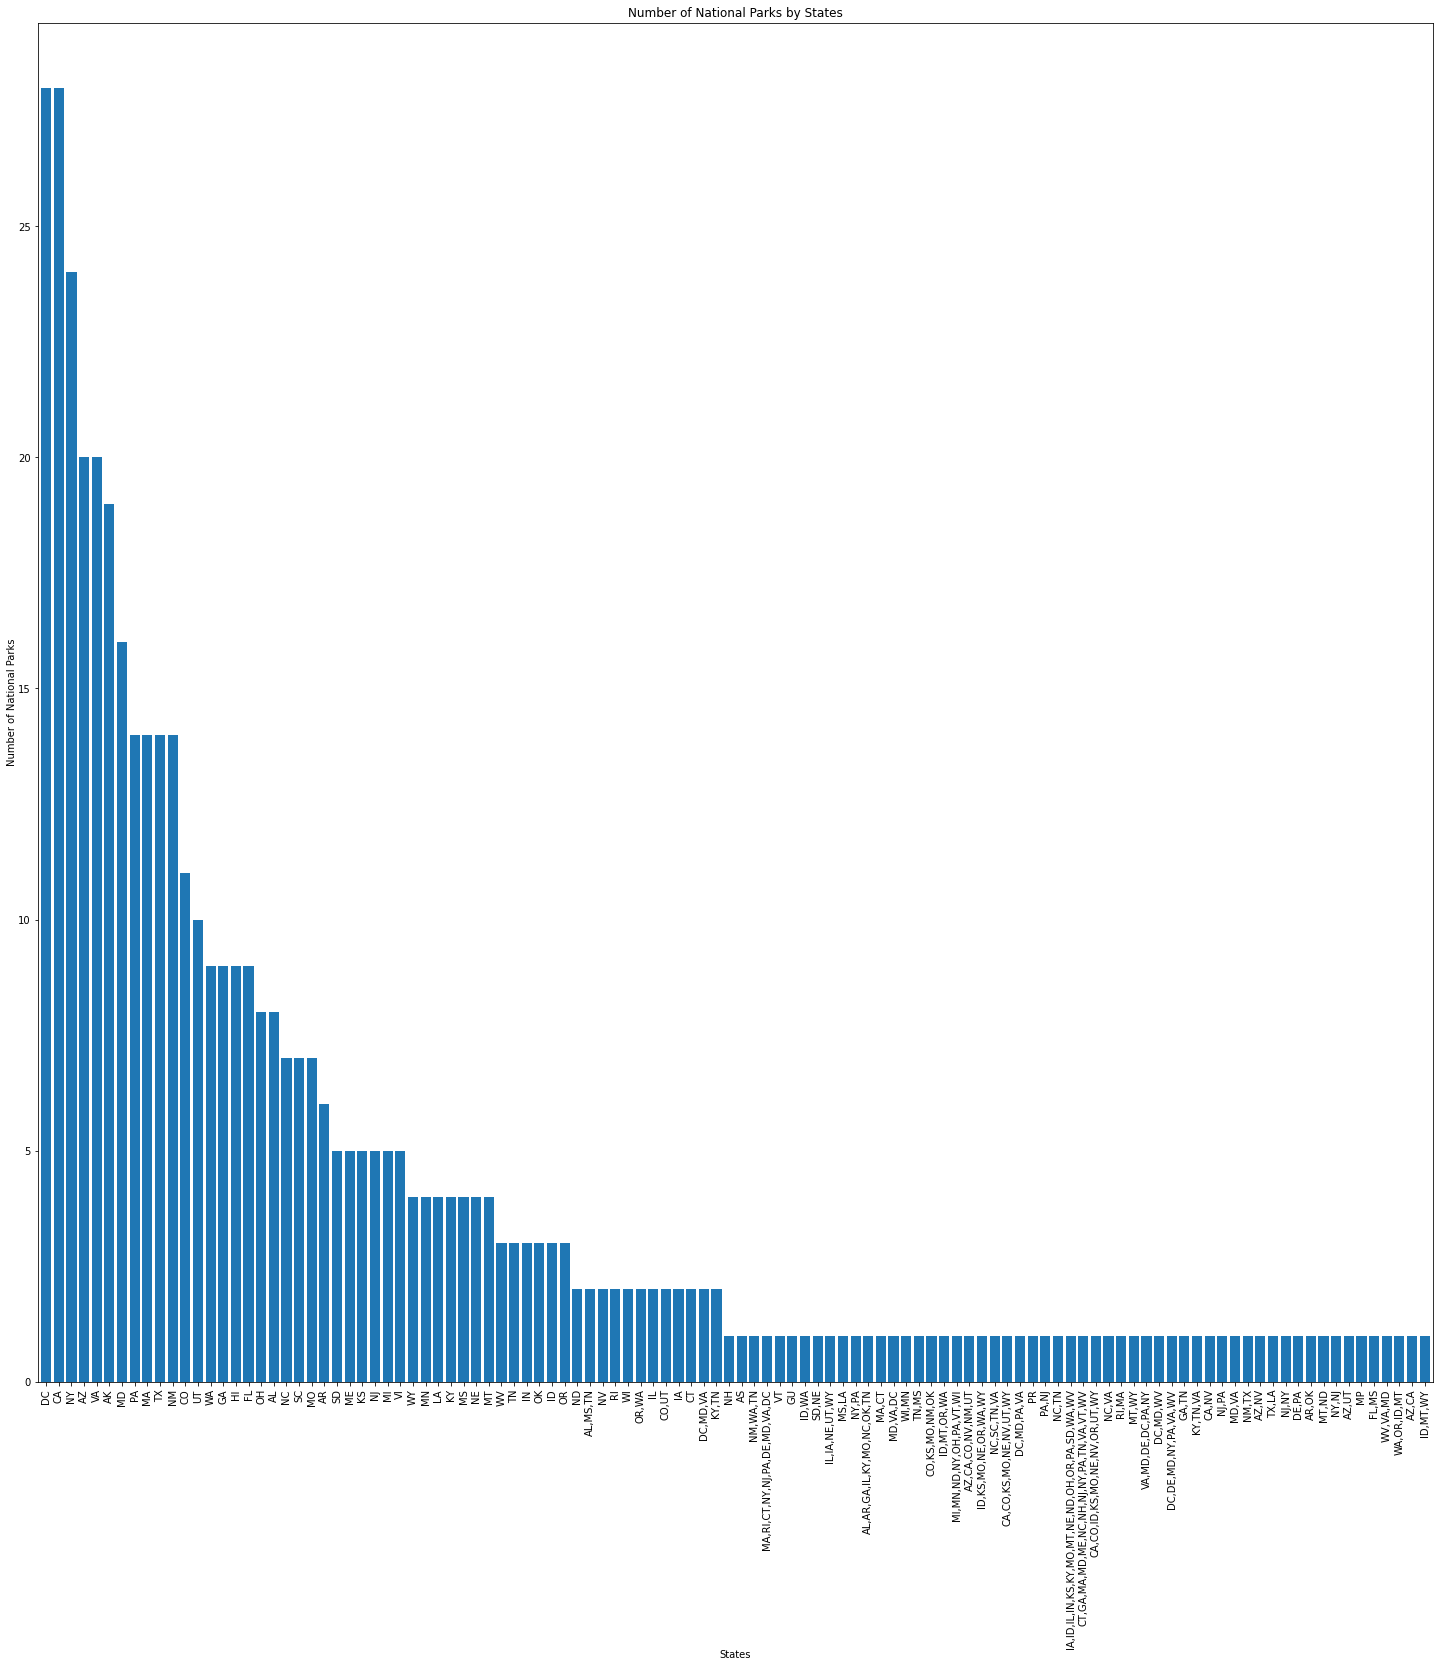

In [286]:
df['State'].value_counts().plot(kind='bar', width = 0.8);
plt.rcParams['figure.figsize'] = [25, 25]
plt.xlabel("States", labelpad = 1)
plt.ylabel("Number of National Parks", labelpad = 1)
plt.title("Number of National Parks by States")

Use what got in the previous step for generating a bar chart for a easy and clear look on situation.

Notice that there are some 'state' are actually combined by two or more states. This is due to the natural location some natural parks at. It is my first time to know national parks are this huge. One park crosses more than ten states, which I think it's amazing!

In [287]:
df_new = df[['State', 'Types of Activities']]

Merge two specific columns for further analysize.

In [288]:
df_new

,State,Types of Activities
0,KY,14
1,ME,46
2,MA,6
3,DC,2
4,NY,7
5,NE,16
6,HI,43
7,AK,12
8,AK,0
9,CA,5


In [289]:
df_sum = (df_new.groupby('State', sort=False).agg(SumOfActivities = ('Types of Activities','sum')))
print(df_sum)

                                                 SumOfActivities
State                                                           
KY                                                            57
ME                                                            68
MA                                                           128
DC                                                           199
NY                                                           273
NE                                                            58
HI                                                           122
AK                                                           378
CA                                                           526
TX                                                           230
PA                                                           168
CO                                                           204
MP                                                            22
GA                       

Use '.groupby().agg()' to sum the certain numbers of activities under 'Types of Activities' column who have the same value in 'State' column.

Text(0.5, 1.0, 'Number of Actvities held by National Parks as State')

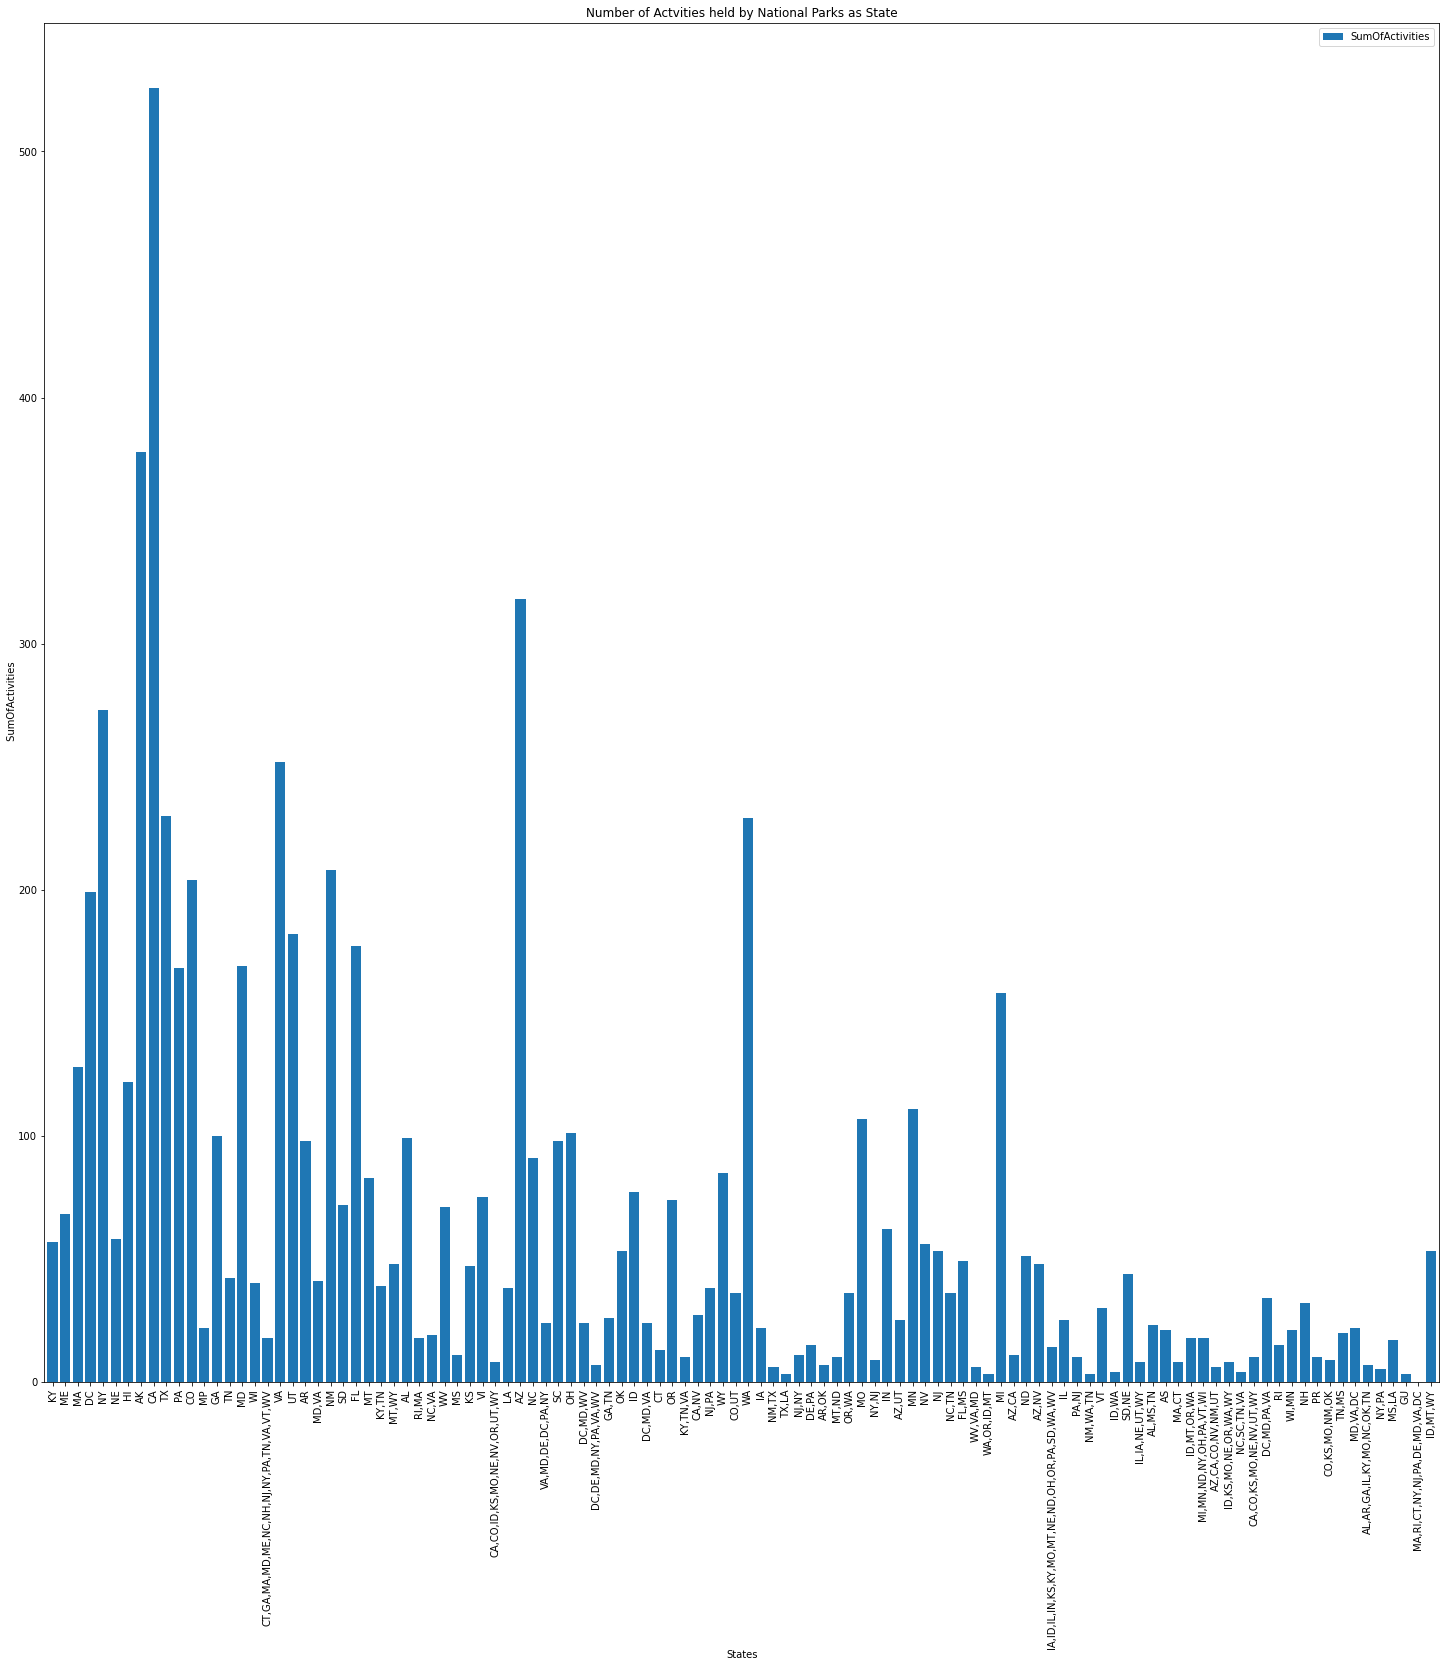

In [290]:
df_sum.plot(kind='bar', width = 0.8);
plt.rcParams['figure.figsize'] = [25, 25]
plt.xlabel("States", labelpad = 1)
plt.ylabel(" SumOfActivities", labelpad = 1)
plt.title("Number of Actvities held by National Parks as State")

Use the data to generate graph to determining if there is a relationship between numbers of national parks a state have and the total variety of activities national parks inthat state hold.

But overall, we still can say that the state with more national parks holds more activities. I think it's important to know this as these are huge attraction to tourists/visitors. A huge add-on beisdes the beautiful scene. That means more popularity and income!

Text(0.5, 1.0, 'Activities Distribution')

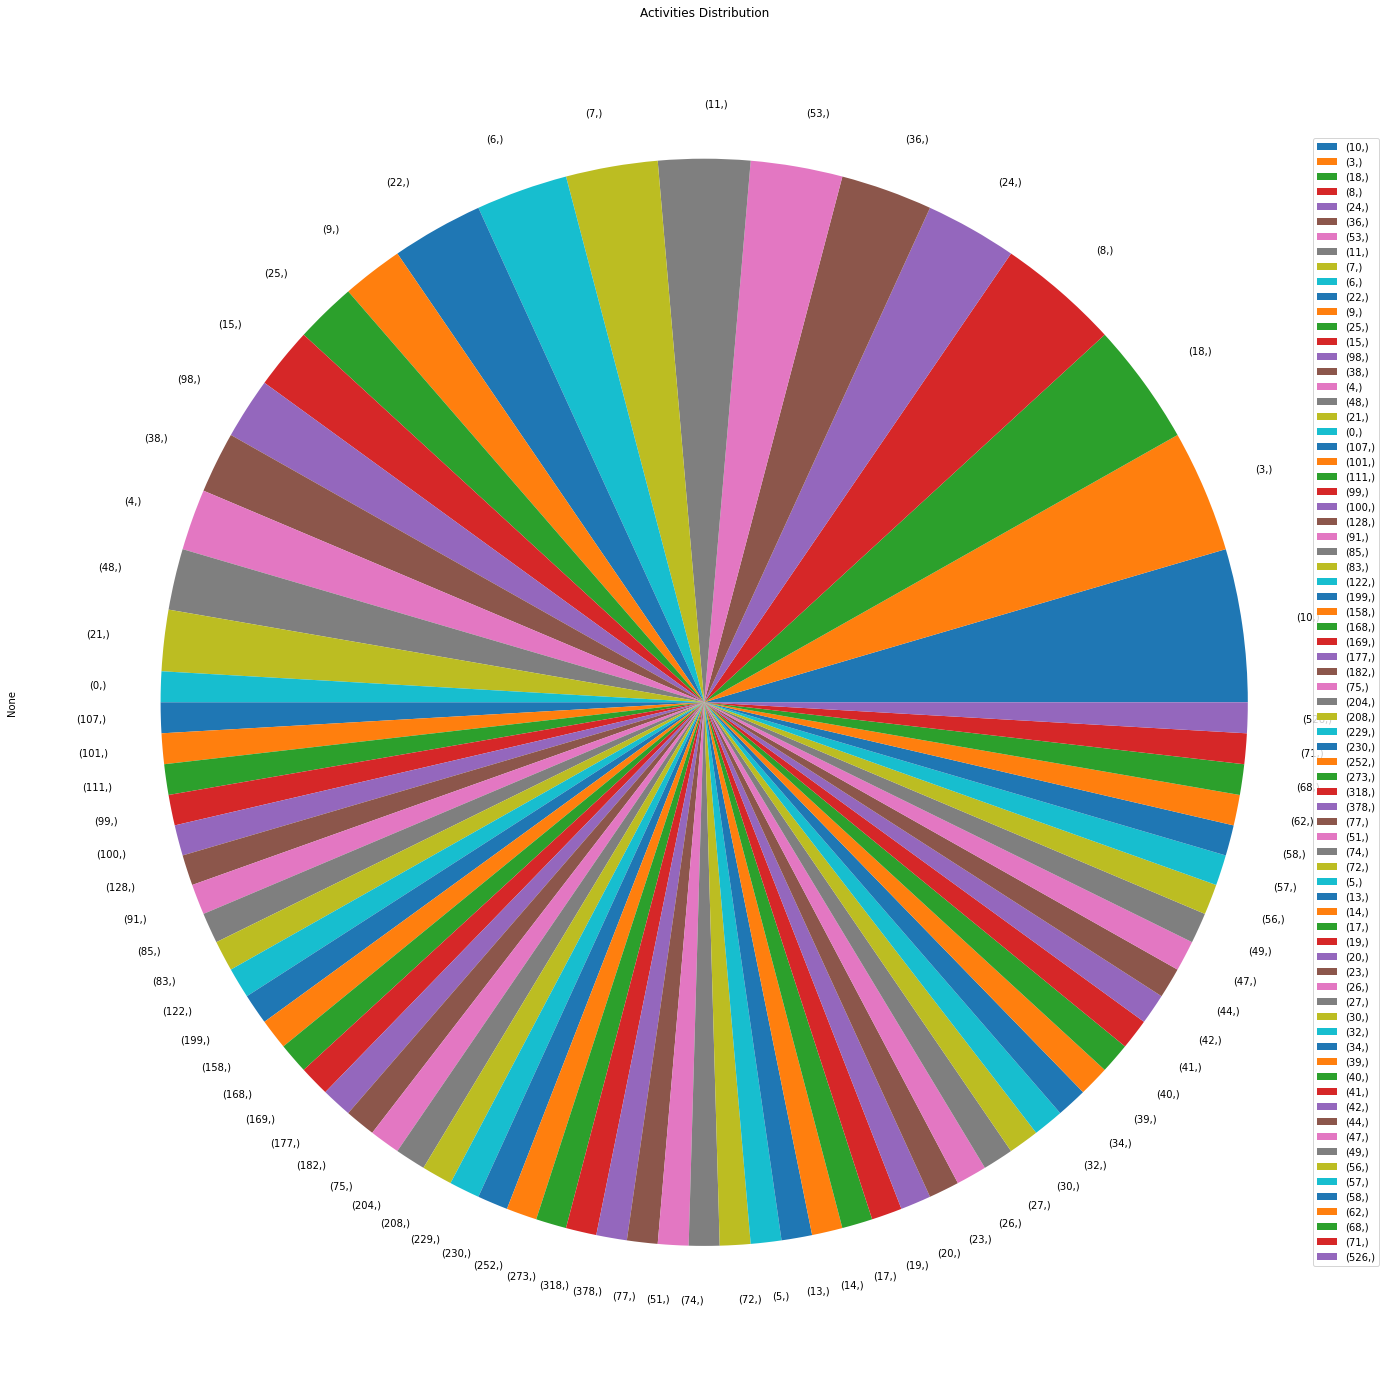

In [295]:
pie_pct = df_sum.value_counts(normalize=True)
pie_pct.plot.pie()
plt.legend(loc='right')
plt.title('Activities Distribution')

Pie chart for the distributions